# **Projet ISSD**

**Élève**: Loïs GALLAUD 1A Généraliste

**Date de début**: 29/03/2023

---


In [27]:
# Importation des librairies nécessaires
import numpy as np 
import csv
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(color_codes = True)
sns.set(font_scale=1.5) # fixe la taille de la police à 1.5 * 12pt
from scipy import stats

---

## **I - CHOIX DU SUJET**

### **1)** Analyse des données

Je décide dans un premier temps de regarder quelles sont les données que j'aurai à traiter:

* **Données météo**: ```|Date|Pression au niveau mer|Variation de pression en 3 heures|Direction du vent moyen 10 mn|Vitesse du vent moyen 10 mn|Température|Point de rosée|Humidité|Visibilité horizontale|Temps présent|Temps passé 1|Temps passé 2|Nebulosité totale|Nébulosité  des nuages de l' étage inférieur|Hauteur de la base des nuages de l'étage inférieur|Type des nuages de l'étage inférieur|Type des nuages de l'étage moyen|Type des nuages de l'étage supérieur|Pression station|Niveau barométrique|Variation de pression en 24 heures|Méthode de mesure Température du thermomètre mouillé|Température du thermomètre mouillé|Rafale sur les 10 dernières minutes|Rafales sur une période|Periode de mesure de la rafale|Etat du sol|Hauteur totale de la couche de neige, glace, autre au sol|Hauteur de la neige fraîche|Periode de mesure de la neige fraiche|Précipitations dans la dernière heure|Précipitations dans les 3 dernières heures|Précipitations dans les 12 dernières heures|Précipitations dans les 24 dernières heures|Phénomène spécial 1|Phénomène spécial 2|Phénomène spécial 3|Phénomène spécial 4|Nom|Température (°C)|Température minimale sur 12 heures (°C)|Température minimale sur 24 heures (°C)|Température maximale sur 12 heures (°C)|Température maximale sur 24 heures (°C)|Température minimale du sol sur 12 heures (en °C)|Latitude|Longitude|Altitude|department (name)|department (code)|region (name)|mois_de_l_annee```

* **Données jeu de société**: ``name|yearpublished|sortindex|minplayers|maxplayers|minplaytime|maxplaytime|minage|usersrated|average|stddev|avgweight|numweights|numcomments|boardgamehonor|boardgamecategory|boardgamemechanic|boardgamefamily``

### **2)** Remarques:

* Les données météo sont divisées en beaucoup plus de critères que les données des jeux de société. 
> Cela veut donc dire que je risque de devoir faire plus de travail sur les interprétations des données des jeux de société que sur les données météo.

* Taille des fichiers de données: le fichier `csv` des données météo (``226032 Ko``) est beaucoup plus lourd que les données des jeux de société (``4580 Ko``). Les données météo sont donc beaucoup plus lourdes à traiter.
> Cela veut aussi dire que les résultats de mes analyses seront peut être plus précises sur les données météo que sur les données des jeux de société.

<img src="./IMAGES/BoardGameGeek_Logo.png" align='right'>

### **3)** Choix

Pour pouvoir me laisser une plus grande liberté dans le choix de mes analyses, **je décide de travailler sur les données des jeux de société**.

---

## **II - PRÉTRAITEMENT DES DONNÉES**

### **1)** Chargement des données:

In [28]:
DATA = pd.read_csv('./DATA/dirty_boardgames.csv', delimiter = ';', index_col = 'sortindex')

### **2)** Données doublons/manquantes
On enlève les doublons et les valeurs manquantes:
> Je décide dans un premier temps de supprimer les lignes qui contiennent des valeurs manquantes. Sans considérer les valeurs manquantes, je peux déjà faire des analyses sur les données. Je pourrais ensuite essayer de remplacer les valeurs manquantes par des valeurs moyennes ou par des valeurs qui ont du sens si cela prend sens par la suite.

In [29]:
df = DATA.copy() # on crée l'objet df qui est une copie de DATA
length_before = len(df)

df.drop_duplicates() # supprime les lignes dupliquées
df.dropna(how = 'any') # supprime les lignes contenant des nan pour toutes les variables du df
length_after = len(df)

print(f'Nombre de lignes supprimées : {length_before - length_after}')  # on affiche le nombre de lignes supprimées
print(f'Nombre de lignes et de colonnes au total: {df.shape}') # on affiche le nombre de lignes et de colonnes du df

Nombre de lignes supprimées : 0
Nombre de lignes et de colonnes au total: (20000, 17)


On remarque que les données ne contiennent **pas de doublons ni de valeurs manquantes**. 

De plus, le fichier `csv` contient exactement 20 000 lignes, **ce qui est relativement peu** comparé à l'autre jeu de données. Je n'ai donc pas intérêt à supprimer des lignes.

### **3)** Données aberrantes

On peut dans un premier temps essayer de détecter les valeurs aberrantes à l'œil. Pour cela, on peut utiliser la fonction `describe()` qui nous donne des informations sur les données.

In [30]:
df.describe()

,yearpublished,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments
count,20000.000000,20000.000000,20000.00000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,1981.268700,2.055250,5.59215,68.096450,94.28945,9.476350,739.616350,6.275440,1.499691,1.931761,48.059050,191.515100
std,219.223277,0.745537,15.04921,466.502106,1005.75196,3.738842,3096.843206,1.065339,0.340743,0.897206,198.113638,606.892077
min,-3500.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1997.000000,2.000000,4.00000,20.000000,30.00000,8.000000,47.000000,5.712778,1.309920,1.255050,4.000000,21.000000
50%,2008.000000,2.000000,4.00000,30.000000,45.00000,10.000000,105.000000,6.354170,1.471575,1.910900,9.000000,44.000000
75%,2015.000000,2.000000,6.00000,60.000000,90.00000,12.000000,333.250000,6.955793,1.663782,2.500000,25.000000,122.000000
max,2021.000000,10.000000,999.00000,60000.000000,120000.00000,25.000000,90730.000000,9.442860,4.500000,5.000000,7104.000000,17143.000000


#### _Remarques:_

* colonne `yearpublished`: la valeur minimale est de -3500. La valeur de l'écart s'en retrouve donc impactée.
* colonnes `min/maxplayers` & `min/maxplaytime`: les valeurs minimales et maximales ne sont pas vraiment interprétables: est ce que 0 dans `minplayers` signifie que le jeu n'a pas de minimum de joueurs ou est ce que cela signifie que le jeu est un jeu solo? De même pour les valeurs maximales comme celle de `maxplayers` de 999 (pas de maximum de joueurs?).
* colonne `usersrated`: rien qu'ne regardant la valeur d'écart type on s'attend à avoir des valeurs aberrantes. Cependant, la colonne `usersrated` est une colonne qui contient le nombre de personnes qui ont noté le jeu. Il est donc normal d'avoir des valeurs très grandes si l'ensemble de données contient des jeux de société très connus. Le même phénomène est présent su rla colone `numweights` et `numcomments`.

**Conclusion de cette première analyse:**

Le jeu de données doit être étudié plus en détails. Il est possible que certaines colonnes ne soient pas interprétables ou qu'elles contiennent des valeurs aberrantes OU BIEN au contraire qu'elles contiennent des valeurs qui ont du sens: pour cela j'ai besoin d'aller sur le [site internet](https://boardgamegeek.com/browse/boardgame) d'où le jeu de données a été téléchargé pour comprendre le sens de chaque colonne.

### **4)** Recherches sur [Board Game Geek](https://boardgamegeek.com/)

Pour essayer de comprendre à quoi servent chaque colonne, je décide de regarder plus en détails un exemple sur le site internet [Board Game Geek](https://boardgamegeek.com/).
À l'heure actuelle, le jeu de société le mieux noté du site est le jeu [Brass: Birmingham](https://boardgamegeek.com/boardgame/224517/brass-birmingham).

<img src="./IMAGES/Brass_Birmingham.png" />

In [31]:
brass = df[df['name'].str.contains('Birmingham', na=False)]
brass.head(n=1)

,name,yearpublished,minplayers,maxplayers,minplaytime,maxplaytime,minage,usersrated,average,stddev,avgweight,numweights,numcomments,boardgamehonor,boardgamecategory,boardgamemechanic,boardgamefamily
sortindex,,,,,,,,,,,,,,,,,
5,Brass Birmingham,2018,2,4,60,120,14,10070,8.62031,1.22876,3.9122,467,1702,['2018 Golden Geek Best Board Game Artwork & P...,"['Economic', 'Industry / Manufacturing', 'Tran...","['Hand Management', 'Income', 'Loans', 'Market...","['Beer', 'Brass', 'Cities: Birmingham (England..."


> Veuillez noter que **le jeu de données a été téléchargé il y a quelques années**. Il est donc possible que le jeu de données ne contienne pas les dernières données du site internet. On suppose que le jeu de données a été téléchargé en 2021 car le maximum de la colonne `yearpublished` est de 2021.

On peut déjà retrouver des colonnes qui nous intéresse sur la page d'accueil du jeu et en déduire des choses:

* `avgweight`: sa note est de 3.90/5, ce qui confirme bien que la données doit aller de 0 à 5. Il s'agit du "niveau de complexité du jeu".
* `min/maxplaytime`: on comprend désormais que les notations "60 - 120 min" est notée dans la dataframe minplaytime = 60 et maxplaytime = 120.
* `min/maxplayers`: on comprend que les notations "2 - 4" est notée dans la dataframe minplayers = 2 et maxplayers = 4.
* `usersrated`: on voit sur cet exemple qu'il y a bel et bien des jeux qui peuvent avoir beaucoup de notes. Notre première analyse qui était de dire que le jeu de données contenait des jeux très connus et des jeux moins connus **était donc correcte**.

### **Conclusion** du prétraitement des données:

* Les données ont déjà l'air propres. Il n'y a pas de valeurs manquantes ni de doublons.
* Cependant il est possible que certaines colonnes contiennent des valeurs aberrantes.
* Certaines colonnes fonctionnent ensemble et nécessite de connaitre comment la notation est faite sur le site pour pouvoir les interpréter correctement. Par exemple, les colonnes `min/maxplayers` et `min/maxplaytime` sont liées.

> À mon avis, il est cohérent que les données soient aussi propres **puisqu'il s'agit de données rentrées par des utilisateurs sur un site internet**. Les utilisateurs sont donc sensibilisés à la qualité des données qu'ils rentrent et les données sont soumises à une validation par les administrateurs du site ou par un algorithme.

**RÉSUMÉ DES COLONNES:**
| Nom de la colonne | Description |    
|:-----------------:|:-----------:|
| yearpublished | Année de sortie du jeu |
| sortindex | Indice du jeu |
| minplayers | Nombre minimum de joueur |
| maxplayers | Nombre maximum de joueur |
| minplaytime | Durée minimum du jeu |
| maxplaytime | Durée maximale du jeu |
| minage | Age minimum conseillé pour jouer |
| usersrated | Nombre de personne ayant noté ce jeu |
| average | Note moyenne attribuée par les internautes |
| stddev | Ecart type des notes attribuées par les internautes |
| avgweight | Difficulté moyenne attribué à ce jeu de 0 à 5|
| numweights | Nombre de personne ayant noté la difficulté de ce jeu |
| numcomments | Nombre de commentaires |
| boardgamehonor | Prix remportés |
| boardgamecategory | Mot-clé(s) caractérisant la catégorie du jeu |
| boardgamemechanic | Mot-clé(s) caractérisant les mécaniques principales du jeu|
| boardgamefamily | Mot-clé(s) caractérisant la famille du jeu |

---

## **III - ANALYSE DU JEU DE DONNÉES**

> Je ne propose pas qu'une seule problématique pour l'analyse de ce jeu de données. Je préfère rester libre dans l'exploration des données au fur et à mesure que les questions se posent.

### **0)** Premiers axes de réflexion:

Quelques questions qui me viennent à l'esprit:

* Quels sont les caractéristiques des jeux de société les mieux notés?
* Quelles sont les caractéristiques des jeux de société les plus complexes?
* Quel est l'impact du temps sur les jeux de société?

#### **1)** Quelles sont les caractéristiques communes des jeux de société les mieux notés?

On peut dans un premier temps se demander ce que veut dire "les mieux noté". À partir de quelle note un jeu est considéré comme "bien noté"? Est ce qu'il suffit de prendre tous les jeux qui ont une note supérieure à 5? à 6?

Essayons de répondre à ces questions en regardant les statistiques descriptives de la colonne `average`:


Moyenne: 6.28 - Médiane: 6.35 - Ecart type: 1.07


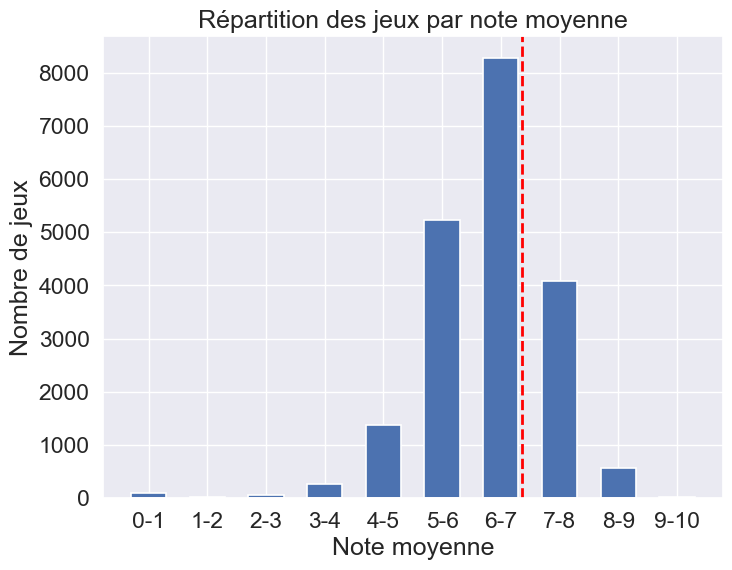

In [68]:
# Intervalles
intervals = [[i, i+1] for i in range(10)]

# Calcul du nombre de jeux par intervalle
amounts = []
for interval in intervals:
    i, j = interval
    games_in_interval = df[(df['average'] >= i) & (df['average'] < j)]
    amounts.append(len(games_in_interval))

# Calcul de la moyenne, médiane et de l'écart type
mean = df['average'].mean()
median = df['average'].median()
std = df['average'].std()
print(f"Moyenne: {mean:.2f} - Médiane: {median:.2f} - Ecart type: {std:.2f}")

# Création de l'histogramme en barres
plt.figure(figsize=(8,6))
plt.title("Répartition des jeux par note moyenne")
plt.xlabel("Note moyenne")
plt.ylabel("Nombre de jeux")

labels = [f"{i}-{i+1}" for i in range(10)]
plt.bar(labels, amounts, linewidth=1.2, width=0.6)
plt.axvline(median, color='red', linestyle='dashed', linewidth=2)
plt.show()

On remarque qu'il y a peu de jeux qui ont été noté en dessous de 5. Il ne sert donc à **rien** de considérer un jeu comme "bien noté" s'il a une note supérieure à 5. 

Considérons pour la suite que les jeux qui ont une note moyenne **supérieure ou égale à la médiane (6.35) sont des jeux "bien notés"**. Cela nous laisse 10 000 jeux à étudier. Appelons les jeux bien notés `good_games`.



In [66]:
good_games = df[df['average'] > median]
print(len(good_games))

9997


Découvrons maintenant les caractéristiques des jeux biens notés:

* En quelle année sont sortis les meilleurs jeux de société?
* Quelle est la difficulté moyenne des meilleurs jeux de société?
* Quelle est la mécanique de jeu des meilleurs jeux de société?

##### **1-A)** En quelle année sont sortis les meilleurs jeux de société?

Tout d'abord, faisons une première analyse des données pour voir si les jeux bien notés sont répartis de manière homogène dans le temps:

In [91]:
# Obtenir une liste des années présentes dans la dataframe good_games
years = pd.DataFrame(good_games['yearpublished'])
years.describe()

2013.0


,yearpublished
count,9997.000000
mean,1994.642793
std,166.841691
min,-3000.000000
25%,2004.000000
50%,2013.000000
75%,2017.000000
max,2021.000000


Comme explicité dans le prétraitement des données, la colonne `yearpublished` contient effectivement des valeurs aberrantes. Pour savoir à partir de quelle date il est pertinent de considérer les jeux, regardons les statistiques descriptives de la colonne `yearpublished`: 

Nettoyons le jeu de données en supprimant les valeurs négatives et noulles de ``yearpublished``:

In [107]:
# Sélectionner les jeux ayant une date de sortie supérieure à 0
valid_years = pd.DataFrame(years[years['yearpublished'] > 0])
valid_years.describe()


,yearpublished
count,9939.000000
mean,2006.805916
std,33.923497
min,400.000000
25%,2004.000000
50%,2013.000000
75%,2017.000000
max,2021.000000


> On peut d'ores et déjà noter qu'il existe des jeux qui ont été publiés dès l'an 400. Est-ce une erreur? Gardons ça en tête pour l'instant.

On peut à présent se demander si les jeux bien notés sont répartis de manière homogène dans le temps. Pour cela, on va regarder la proportion de jeux bien notés par année:

Moyenne: 1981.27 - Médiane: 2008.00 - Ecart type: 219.22


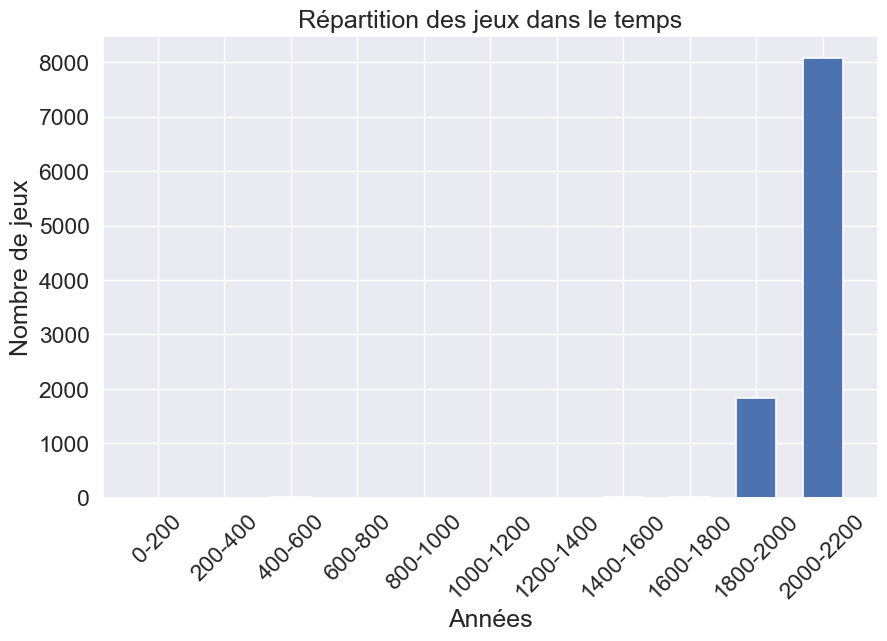

In [148]:
# Intervalles de 10 ans
intervals = [[i, i+200] for i in range(0, 2021, 200)]

# Calcul du nombre de jeux par intervalle
amounts = []
for interval in intervals:
    i, j = interval
    games_in_interval = valid_years[(valid_years['yearpublished'] >= i) & (valid_years['yearpublished'] < j)]
    amounts.append(len(games_in_interval))

# Calcul de la moyenne, médiane et de l'écart type
mean = df['yearpublished'].mean()
median = df['yearpublished'].median()
std = df['yearpublished'].std()
print(f"Moyenne: {mean:.2f} - Médiane: {median:.2f} - Ecart type: {std:.2f}")

# Création de l'histogramme en barres
plt.figure(figsize=(10,6))
plt.title("Répartition des jeux dans le temps")
plt.xlabel("Années")
plt.xticks(rotation=45)
plt.ylabel("Nombre de jeux")

labels = [f"{i}-{i+200}" for i in range(0, 2021, 200)]
plt.bar(labels, amounts, linewidth=1.2, width=0.6)
plt.show()


Un premier graphe montre que la proportion de jeux bien notés est essentiellement entre 1800 et 2021. En affinant les tranches d'années, on peut voir que la proportion de jeux bien notés est très faible avant 1950.

> On vient de répondre à notre question précédente: il semblerait que les valeurs comme 400 soit effectivement des valeurs aberrantes. On peut donc supprimer les jeux publiés avant 1950.

Moyenne: 1981.27 - Médiane: 2008.00 - Ecart type: 219.22


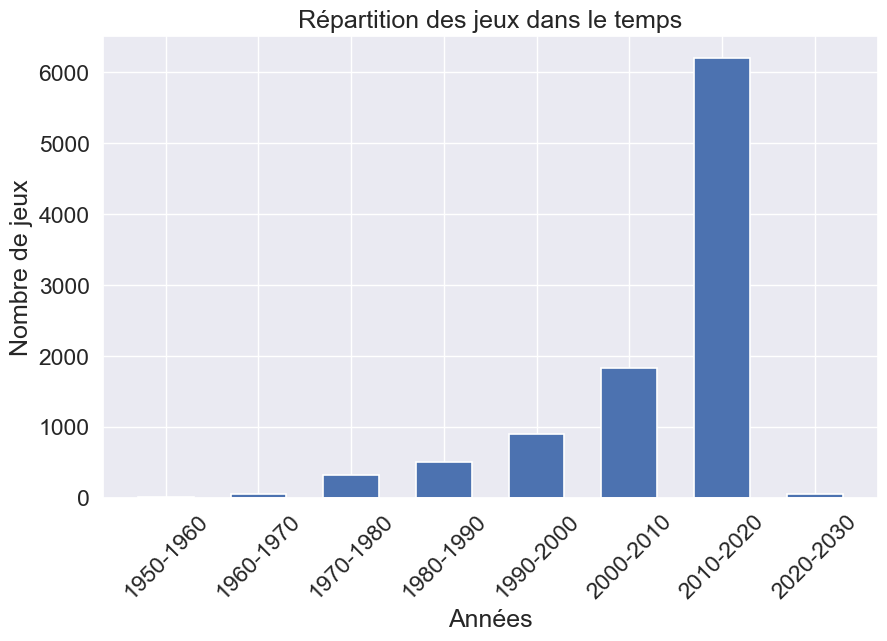

In [154]:
# Intervalles de 10 ans
intervals = [[i, i+10] for i in range(1950, 2021, 10)]

# Calcul du nombre de jeux par intervalle
amounts = []
for interval in intervals:
    i, j = interval
    games_in_interval = valid_years[(valid_years['yearpublished'] >= i) & (valid_years['yearpublished'] < j)]
    amounts.append(len(games_in_interval))

# Calcul de la moyenne, médiane et de l'écart type
mean = df['yearpublished'].mean()
median = df['yearpublished'].median()
std = df['yearpublished'].std()
print(f"Moyenne: {mean:.2f} - Médiane: {median:.2f} - Ecart type: {std:.2f}")

# Création de l'histogramme en barres
plt.figure(figsize=(10,6))
plt.title("Répartition des jeux dans le temps")
plt.xlabel("Années")
plt.xticks(rotation=45)
plt.ylabel("Nombre de jeux")

labels = [f"{i}-{i+10}" for i in range(1950, 2021, 10)]
plt.bar(labels, amounts, linewidth=1.2, width=0.6)
plt.show()

Visiblement **les jeux bien notés sont majoritairement sortis après 1950**. De plus, la répartition des meilleurs jeux dans le temps suit une **loi exponentielle**. On peut conjecturer que cela est dû à la popularité grandissante du site BGG ces dernières années ou bien tout simplement à la popularité grandissante des jeux de société notamment grâce à des sites comme BGG.

##### **1-B)** Quelle est la mécanique de jeu / catégorie du jeu préférée?

Commençons par recenser les différentes mécanique de jeu présentes dans les meilleurs jeux de société:

In [161]:
mech_cat_games = pd.DataFrame({'name': good_games['name'], 'boardgamemechanic': good_games['boardgamemechanic'], 'boardgamecategory': good_games['boardgamecategory']})

mech_cat_games.head()

,name,boardgamemechanic,boardgamecategory
sortindex,,,
1,Gloomhaven,"['Campaign / Battle Card Driven', 'Cooperative...","['Adventure', 'Exploration', 'Fantasy', 'Fight..."
2,Pandemic Legacy Season 1,"['Action Points', 'Cooperative Game', 'Hand Ma...","['Environmental', 'Medical']"
3,Terraforming Mars,"['Card Drafting', 'End Game Bonuses', 'Hand Ma...","['Economic', 'Environmental', 'Industry / Manu..."
4,Through the Ages A New Story of Civilization,"['Action Points', 'Auction/Bidding', 'Auction:...","['Card Game', 'Civilization', 'Economic']"
5,Brass Birmingham,"['Hand Management', 'Income', 'Loans', 'Market...","['Economic', 'Industry / Manufacturing', 'Tran..."


En utilisant la méthode `explode` de pandas, on peut facilement compter le nombre de fois où une mécanique de jeu est présente dans les meilleurs jeux de société:

In [167]:
# Utilisation de explode pour obtenir chaque élément de la liste dans une ligne distincte
mechanics_exploded = good_games.explode('boardgamemechanic')
mechanics_counts = mechanics_exploded['boardgamemechanic'].value_counts()




##### **1-C)** Quelle est la difficulté moyenne des meilleurs jeux de société?
>> Transition sur la difficulté des jeux et leur appréciation (est ce que les gens sont des rageux?)




#### **2)** Quelles sont les caractéristiques des jeux de société les plus complexes?

---

### **PREDICTIONS**

---

### **REGRESSION LINEAIRE**

---

### **Conclusion**